In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly_express as px
from sklearn.preprocessing import LabelEncoder

读入数据

In [2]:
info_data = pd.read_csv('danke_gz.csv')
info_data.head()

,编号,价格,是否合租,面积,楼层,小区,区域,户型(室),户型(厅),户型(卫),地铁(号线),到地铁的距离
0,1,1210,合,5,8,骏景花园1,车陂南,4,1,1,4,900
1,2,1670,合,10,3,富力天朗明居S区,车陂,3,1,1,4,350
2,3,1210,合,9,3,盈彩美居碧彩轩,三溪,4,1,1,5,1150
3,4,1250,合,10,18,盈彩美居碧彩轩,三溪,4,1,1,5,1150
4,5,1880,合,14,10,骏景花园1,车陂南,4,1,1,4,900


price

In [3]:
price = info_data['价格']
hezu = info_data['是否合租']
area = info_data['面积']
floor = info_data['楼层']
xiaoqu = info_data['小区']
position = info_data['区域']
type1 = info_data['户型(室)']
type2 = info_data['户型(厅)']
type3 = info_data['户型(卫)']
subway1 = info_data['地铁(号线)']
subway2 = info_data['到地铁的距离']

将小区和区域的文本信息转换成数值型
删除编号和是否合租这两列

In [4]:
data = info_data
le = LabelEncoder()
data['小区'] = le.fit_transform(data['小区'])
data['区域'] = le.fit_transform(data['区域'])

data = data.drop(['编号'], axis=1)
data = data.drop(['是否合租'], axis=1)

data

,价格,面积,楼层,小区,区域,户型(室),户型(厅),户型(卫),地铁(号线),到地铁的距离
0,1210,5,8,651,72,4,1,1,4,900
1,1670,10,3,281,71,3,1,1,4,350
2,1210,9,3,517,1,4,1,1,5,1150
3,1250,10,18,517,1,4,1,1,5,1150
4,1880,14,10,651,72,4,1,1,4,900
...,...,...,...,...,...,...,...,...,...,...
1995,1460,17,1,304,8,3,1,1,3,100
1996,3350,26,25,591,55,5,1,1,5,800
1997,1650,19,9,428,78,4,1,1,6,450
1998,1820,8,8,184,65,4,1,1,3,50


In [5]:
data.describe()

,价格,面积,楼层,小区,区域,户型(室),户型(厅),户型(卫),地铁(号线),到地铁的距离
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1595.910000,12.007000,9.158000,350.328000,40.036500,3.835000,1.005000,1.043000,4.467500,578.733500
std,351.101564,4.929209,7.158747,202.709257,24.495003,0.670074,0.070551,0.210174,3.971628,316.925146
min,790.000000,5.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,-1.000000,-1.000000
25%,1360.000000,9.000000,4.000000,167.750000,16.000000,3.000000,1.000000,1.000000,2.000000,350.000000
50%,1550.000000,11.000000,7.000000,357.500000,40.000000,4.000000,1.000000,1.000000,3.000000,550.000000
75%,1790.000000,14.000000,12.000000,540.000000,64.000000,4.000000,1.000000,1.000000,6.000000,800.000000
max,3790.000000,74.000000,44.000000,671.000000,79.000000,8.000000,2.000000,3.000000,21.000000,1750.000000


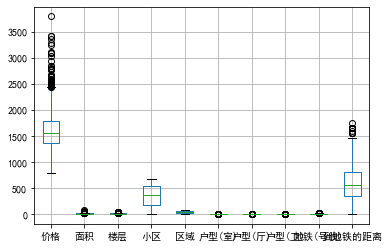

In [6]:
data.boxplot()

提取自变量

In [7]:
factor = data.drop(['价格'], axis=1)
factor.head()

,面积,楼层,小区,区域,户型(室),户型(厅),户型(卫),地铁(号线),到地铁的距离
0,5,8,651,72,4,1,1,4,900
1,10,3,281,71,3,1,1,4,350
2,9,3,517,1,4,1,1,5,1150
3,10,18,517,1,4,1,1,5,1150
4,14,10,651,72,4,1,1,4,900


D:\application\anaconda\anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


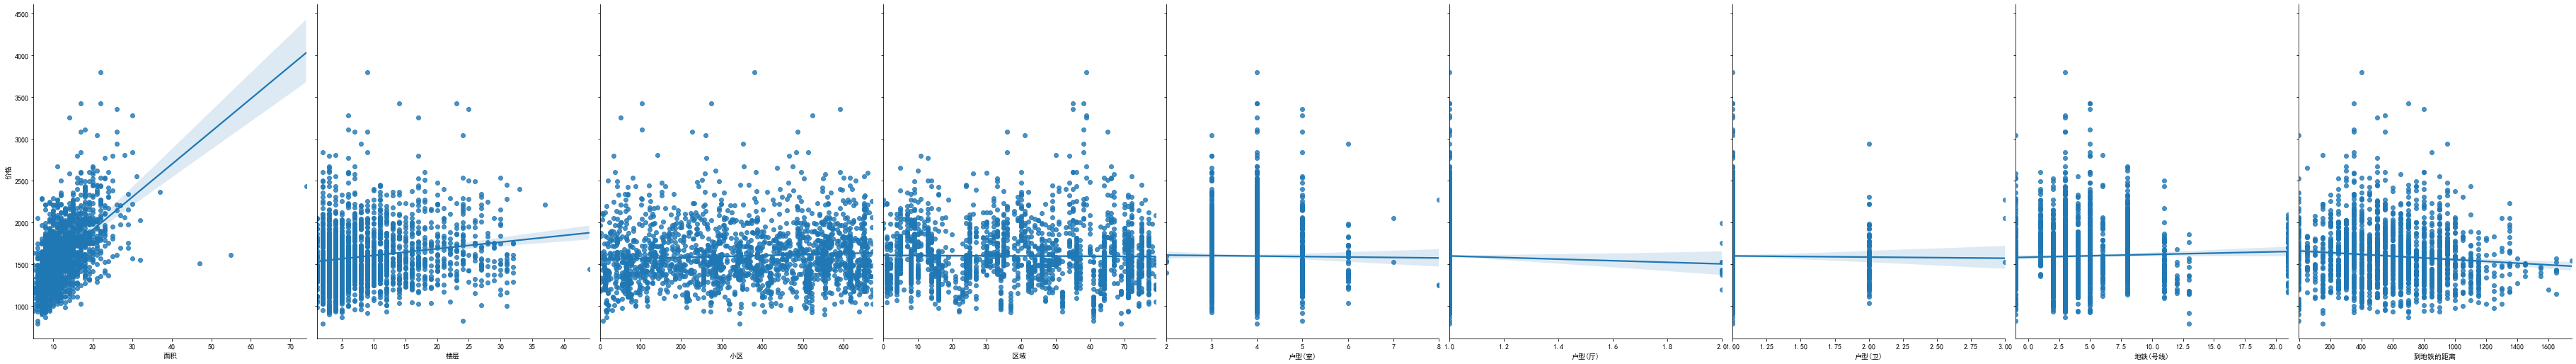

In [8]:
sns.pairplot(data, x_vars=['面积', '楼层', '小区', '区域', '户型(室)', '户型(厅)', '户型(卫)', '地铁(号线)', '到地铁的距离'], y_vars='价格', size=7, aspect=0.8,kind = 'reg')

线性回归

In [9]:
X_train,X_test,Y_train,Y_test = train_test_split(factor,price,train_size=.80,random_state=100)

In [10]:
print("原始数据特征:",data.shape,
      ",训练数据特征:",X_train.shape,
      ",测试数据特征:",X_test.shape)
 
print("原始数据标签:",price.shape,
      ",训练数据标签:",Y_train.shape,
      ",测试数据标签:",Y_test.shape)

原始数据特征: (2000, 10) ,训练数据特征: (1600, 9) ,测试数据特征: (400, 9)
原始数据标签: (2000,) ,训练数据标签: (1600,) ,测试数据标签: (400,)


In [11]:
regr = linear_model.LinearRegression()
 
regr.fit(X_train,Y_train)
 
a  = regr.intercept_#截距
 
b = regr.coef_#回归系数
 
print("最佳拟合线:截距",a,",回归系数：",b)

最佳拟合线:截距 1139.3270062740867 ,回归系数： [ 39.54795218   9.98081691   0.1660135   -0.10929209 -32.28041608
 -11.65151502  16.98197534   6.10987614  -0.12978458]


In [12]:
b

array([ 39.54795218,   9.98081691,   0.1660135 ,  -0.10929209,
       -32.28041608, -11.65151502,  16.98197534,   6.10987614,
        -0.12978458])

In [13]:
print(regr.score(X_test,Y_test))
print(regr.score(X_train,Y_train))

0.3728733195815236
0.3669595498180168


In [14]:
Y_pred = regr.predict(X_test)
# The coefficients
print('Coef_: {} Intercept_: {}\n'.format(regr.coef_, regr.intercept_))
# The mean squared error
print("Mean squared error: %.2f"
% mean_squared_error(Y_test, Y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_test, Y_pred))

Coef_: [ 39.54795218   9.98081691   0.1660135   -0.10929209 -32.28041608
 -11.65151502  16.98197534   6.10987614  -0.12978458] Intercept_: 1139.3270062740867

Mean squared error: 82801.59
Variance score: 0.37


[1548.54325765 1706.98711641 1542.82748101 2197.93659979 1418.90340337
 1734.80537146 1798.5790999  1690.63413818 1577.29893483 1376.16598501
 1458.02860282 1905.14742878 1624.63375952 1595.3875902  1450.29578035
 1526.83977728 1677.0110337  1740.25052448 1580.15094892 1410.6079523
 1396.856626   1617.53258663 1593.31011533 1517.34602406 1294.65254975
 1656.19111646 1561.60931036 1490.0138889  1376.44274378 1454.59793025
 1615.27815022 1785.13556472 1746.01846869 1454.23650853 1438.81798595
 1662.59526708 1623.9380691  1505.59322046 1441.50161174 1741.07788345
 1766.22436069 1312.36238577 1689.46465849 1430.75427618 1394.37928006
 1542.90715799 1553.9581609  1580.01832862 1395.7737512  1356.99955772
 1833.4427852  1470.16879126 1428.41674517 1597.33202117 1636.48773395
 1713.44238804 1386.39385069 1795.74588292 1492.76559883 1739.90777416
 1774.51575815 1611.45631941 1455.10959747 1648.03793809 1396.93133473
 1466.58119741 1833.7996684  1445.65638794 1690.94064428 1343.642263
 1644.575

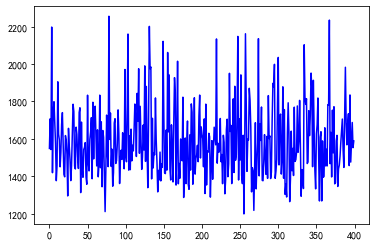

In [15]:
Y_pred = regr.predict(X_test)
 
print(Y_pred)
 
plt.plot(range(len(Y_pred)),Y_pred,'b',label="predict")

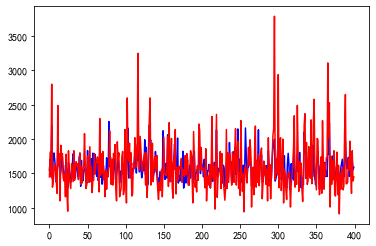

In [16]:
plt.figure()
plt.plot(range(len(Y_pred)),Y_pred,'b',label="predict")
plt.plot(range(len(Y_pred)),Y_test,'r',label="test")
plt.show()

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   价格      2000 non-null   int64
 1   面积      2000 non-null   int64
 2   楼层      2000 non-null   int64
 3   小区      2000 non-null   int32
 4   区域      2000 non-null   int32
 5   户型(室)   2000 non-null   int64
 6   户型(厅)   2000 non-null   int64
 7   户型(卫)   2000 non-null   int64
 8   地铁(号线)  2000 non-null   int64
 9   到地铁的距离  2000 non-null   int64
dtypes: int32(2), int64(8)
memory usage: 140.8 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B348402130>,
      dtype=object)

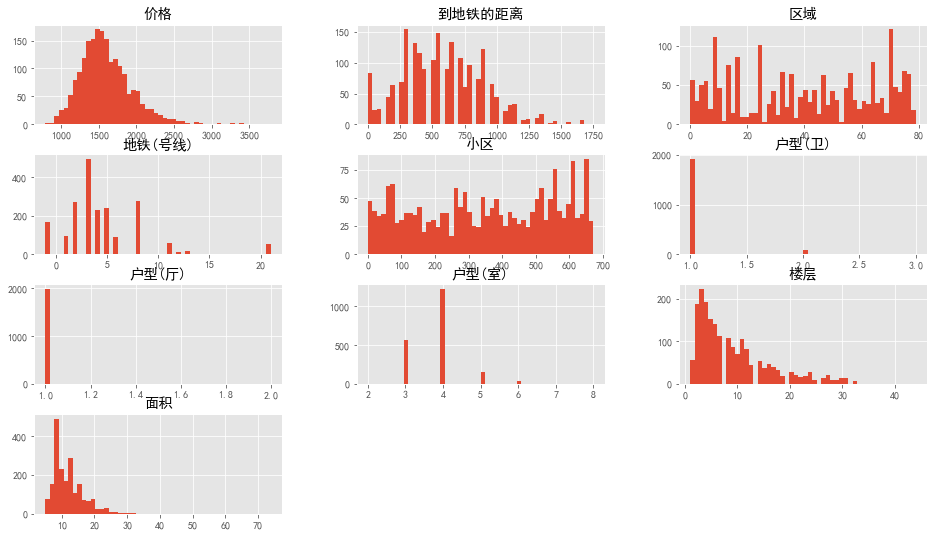

In [18]:
plt.style.use('ggplot')
data.hist(bins=50,figsize=(16,9))

In [19]:
train_set,test_set=train_test_split(data,test_size=0.2,random_state=42)

In [20]:
train_set.head(5)

,价格,面积,楼层,小区,区域,户型(室),户型(厅),户型(卫),地铁(号线),到地铁的距离
968,1940,13,13,572,13,4,1,1,3,800
240,1120,7,5,274,52,3,1,1,2,400
819,1220,11,5,314,48,4,1,1,-1,-1
692,1980,16,7,97,4,4,1,1,2,300
420,1640,12,4,256,8,3,1,1,3,550


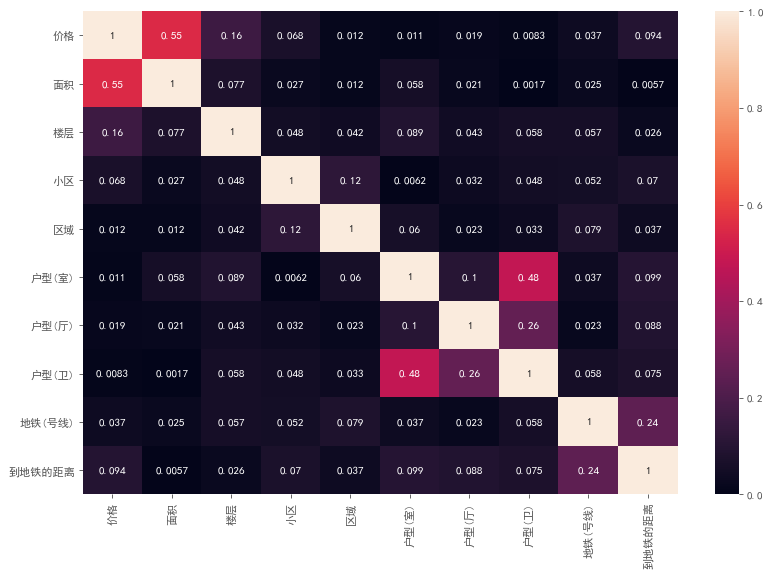

In [21]:
fig=plt.figure(figsize=(12,8),dpi=80)
sns.heatmap(abs(data.corr()),annot =True,vmin = 0, vmax = 1)

In [22]:
factor2 = factor.drop(['户型(厅)'], axis=1)
factor2 = factor2.drop(['户型(卫)'], axis=1)

In [23]:
X_train2,X_test2,Y_train2,Y_test2 = train_test_split(factor2,price,train_size=.95,random_state=100)

In [24]:
regr2 = linear_model.LinearRegression()
regr2.fit(X_train2,Y_train2)
a2  = regr2.intercept_#截距
b2 = regr2.coef_#回归系数
print("最佳拟合线:截距",a2,",回归系数：",b2)

最佳拟合线:截距 1120.2605857602102 ,回归系数： [ 40.75061007  10.12470949   0.13733411  -0.07518772 -26.72050603
   6.1385885   -0.13112221]


In [30]:
Y_pred2 = regr2.predict(X_test2)
# The coefficients
print('Coef_: {} Intercept_: {}\n'.format(regr2.coef_, regr2.intercept_))
# The mean squared error
print("Mean squared error: %.2f"
% mean_squared_error(Y_test2, Y_pred2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_test2, Y_pred2))
score2 = regr2.score(X_test2,Y_test2)
print(score2)
print(regr2.score(X_train2,Y_train2))

Coef_: [ 40.75061007  10.12470949   0.13733411  -0.07518772 -26.72050603
   6.1385885   -0.13112221] Intercept_: 1120.2605857602102

Mean squared error: 53990.12
Variance score: 0.38
0.37769830556608364
0.36773976907265504


In [26]:
def autoNorm(dataSet):
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    ranges = maxVals - minVals
    normDataSet = np.zeros(np.shape(dataSet))
    m = dataSet.shape(0)
    normDataSet = dataSet - np.tile(minVals, (m,1))
    normDataSet = normDataSet/np.tile(ranges,(m,1))
    return normDataSet

In [28]:
group = np.array(data)
print(group)

[[1210    5    8 ...    1    4  900]
 [1670   10    3 ...    1    4  350]
 [1210    9    3 ...    1    5 1150]
 ...
 [1650   19    9 ...    1    6  450]
 [1820    8    8 ...    1    3   50]
 [1460   10    8 ...    1    5  700]]


In [29]:
from sklearn import preprocessing

In [30]:
minmax = preprocessing.MinMaxScaler()
data_minmax = 1000 * minmax.fit_transform(data)
print(data_minmax)

[[140.           0.         162.79069767 ...   0.         227.27272727
  514.5631068 ]
 [293.33333333  72.46376812  46.51162791 ...   0.         227.27272727
  200.45688178]
 [140.          57.97101449  46.51162791 ...   0.         272.72727273
  657.33866362]
 ...
 [286.66666667 202.89855072 186.04651163 ...   0.         318.18181818
  257.56710451]
 [343.33333333  43.47826087 162.79069767 ...   0.         181.81818182
   29.12621359]
 [223.33333333  72.46376812 162.79069767 ...   0.         272.72727273
  400.34266134]]


In [31]:
data.keys()

Index(['价格', '面积', '楼层', '小区', '区域', '户型(室)', '户型(厅)', '户型(卫)', '地铁(号线)',
       '到地铁的距离'],
      dtype='object')

In [32]:
data.min(0)

价格        790
面积          5
楼层          1
小区          0
区域          0
户型(室)       2
户型(厅)       1
户型(卫)       1
地铁(号线)     -1
到地铁的距离     -1
dtype: int64

In [33]:
data.describe()

,价格,面积,楼层,小区,区域,户型(室),户型(厅),户型(卫),地铁(号线),到地铁的距离
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1595.910000,12.007000,9.158000,350.328000,40.036500,3.835000,1.005000,1.043000,4.467500,578.733500
std,351.101564,4.929209,7.158747,202.709257,24.495003,0.670074,0.070551,0.210174,3.971628,316.925146
min,790.000000,5.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,-1.000000,-1.000000
25%,1360.000000,9.000000,4.000000,167.750000,16.000000,3.000000,1.000000,1.000000,2.000000,350.000000
50%,1550.000000,11.000000,7.000000,357.500000,40.000000,4.000000,1.000000,1.000000,3.000000,550.000000
75%,1790.000000,14.000000,12.000000,540.000000,64.000000,4.000000,1.000000,1.000000,6.000000,800.000000
max,3790.000000,74.000000,44.000000,671.000000,79.000000,8.000000,2.000000,3.000000,21.000000,1750.000000


In [34]:
print(data[data['地铁(号线)']==-1])

        价格  面积  楼层   小区  区域  户型(室)  户型(厅)  户型(卫)  地铁(号线)  到地铁的距离
21    1650  10  11  616  64      4      1      1      -1     300
38    1770  12  19  617  64      4      1      1      -1     300
75    1830  14   5  615  64      4      1      1      -1     400
88    1640  15   8  326  64      4      1      1      -1     800
98    1520  10   6  616  64      4      1      1      -1     300
...    ...  ..  ..  ...  ..    ...    ...    ...     ...     ...
1923  1330  18  13  632  34      3      1      1      -1      -1
1938  1350  10   5   48  18      4      1      1      -1      -1
1950  1190  10   2  473  23      4      1      1      -1      -1
1959  1840  14  13  615  64      4      1      1      -1     400
1972  1340   8   4    9  18      4      1      1      -1      -1

[165 rows x 10 columns]


In [35]:
print(data[data['到地铁的距离']==-1])

        价格  面积  楼层   小区  区域  户型(室)  户型(厅)  户型(卫)  地铁(号线)  到地铁的距离
148   1780   8  12  156   7      4      1      1       5      -1
159   1660  15   5  643  50      3      1      1      -1      -1
178   2010  12  12  156   7      4      1      1       5      -1
191   1900  12  11  511  33      3      1      1      -1      -1
202   1980  14   7  644  46      4      1      1      -1      -1
...    ...  ..  ..  ...  ..    ...    ...    ...     ...     ...
1899  1590  13   5    6  44      4      1      1      -1      -1
1923  1330  18  13  632  34      3      1      1      -1      -1
1938  1350  10   5   48  18      4      1      1      -1      -1
1950  1190  10   2  473  23      4      1      1      -1      -1
1972  1340   8   4    9  18      4      1      1      -1      -1

[83 rows x 10 columns]


In [36]:
factor2[factor2['地铁(号线)']==-1] = factor2['地铁(号线)'].mean()
factor2[factor2['到地铁的距离']==-1] = factor2['到地铁的距离'].mean()
factor2.describe()

,面积,楼层,小区,区域,户型(室),地铁(号线),到地铁的距离
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,11.986711,9.294211,315.773711,36.853211,4.461211,5.477711,564.707711
std,18.235362,18.886792,214.784198,30.490565,17.724604,18.046549,332.853947
min,4.467500,1.000000,0.000000,0.000000,2.000000,1.000000,4.467500
25%,8.000000,4.000000,113.000000,10.000000,3.000000,3.000000,350.000000
50%,10.000000,6.000000,311.500000,35.000000,4.000000,4.000000,550.000000
75%,14.000000,12.000000,514.000000,58.000000,4.000000,6.000000,800.000000
max,564.142569,564.142569,671.000000,564.142569,564.142569,564.142569,1750.000000


In [37]:
factor_new = 1000*(factor2-factor2.min())/(factor2.max()-factor2.min())
factor_new

,面积,楼层,小区,区域,户型(室),地铁(号线),到地铁的距离
0,0.951445,12.430245,970.193741,127.627313,3.557816,5.327248,513.042582
1,9.885200,3.551499,418.777943,125.854711,1.778908,5.327248,197.952487
2,8.098449,3.551499,770.491803,1.772602,3.557816,7.102997,656.265352
3,9.885200,30.187737,770.491803,1.772602,3.557816,7.102997,656.265352
4,17.032204,15.981743,970.193741,127.627313,3.557816,5.327248,513.042582
...,...,...,...,...,...,...,...
1995,22.392457,0.000000,453.055142,14.180813,1.778908,3.551499,54.729717
1996,38.473216,42.617982,880.774963,97.493086,5.336724,7.102997,455.753474
1997,25.965959,14.205994,637.853949,138.262922,3.557816,8.878746,255.241595
1998,6.311698,12.430245,274.217586,115.219102,3.557816,3.551499,26.085163


In [38]:
factor_new.describe()

,面积,楼层,小区,区域,户型(室),地铁(号线),到地铁的距离
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,13.434958,14.728440,470.601656,65.326060,4.378269,7.951293,320.956620
std,32.582052,33.538207,320.095675,54.047624,31.530443,32.046146,190.689057
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.311698,5.327248,168.405365,17.726016,1.778908,3.551499,197.952487
50%,9.885200,8.878746,464.232489,62.041055,3.557816,5.327248,312.530703
75%,17.032204,19.533242,766.020864,102.810891,3.557816,8.878746,455.753474
max,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000


In [39]:
price_new = 1000*(price-price.min())/(price.max()-price.min())
price_new

0       140.000000
1       293.333333
2       140.000000
3       153.333333
4       363.333333
           ...    
1995    223.333333
1996    853.333333
1997    286.666667
1998    343.333333
1999    223.333333
Name: 价格, Length: 2000, dtype: float64

In [40]:
xn_train,xn_test,yn_train,yn_test = train_test_split(factor_new,price,train_size=.80,random_state=100)

In [41]:
print("原始数据特征:",factor_new.shape,
      ",训练数据特征:",xn_train.shape,
      ",测试数据特征:",xn_test.shape)
 
print("原始数据标签:",price_new.shape,
      ",训练数据标签:",yn_train.shape,
      ",测试数据标签:",yn_test.shape)

原始数据特征: (2000, 7) ,训练数据特征: (1600, 7) ,测试数据特征: (400, 7)
原始数据标签: (2000,) ,训练数据标签: (1600,) ,测试数据标签: (400,)


In [42]:
regrn = linear_model.LinearRegression()
 
regrn.fit(xn_train,yn_train)
 
a  = regrn.intercept_#截距
 
b = regrn.coef_#回归系数
 
print("最佳拟合线:截距",a,",回归系数：",b)

最佳拟合线:截距 1473.7434178815602 ,回归系数： [ 18.91139681   4.89793997   0.06049663  -0.27953822 -24.87028476
   1.86053699  -0.38581746]


In [43]:
score_new = regrn.score(xn_test,yn_test)
print(score_new)

0.29262777533320306


In [44]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(factor2)
X_scaled

array([[-0.38323662, -0.06854181,  1.56114896, ..., -0.02602747,
        -0.0819038 ,  1.00757749],
       [-0.10897553, -0.3333433 , -0.16194119, ..., -0.08246033,
        -0.0819038 , -0.64521214],
       [-0.16382775, -0.3333433 ,  0.9371109 , ..., -0.02602747,
        -0.02647768,  1.7588455 ],
       ...,
       [ 0.38469445, -0.01558152,  0.52263787, ..., -0.02602747,
         0.02894843, -0.34470494],
       [-0.21867997, -0.06854181, -0.61367022, ..., -0.02602747,
        -0.13732991, -1.54673376],
       [-0.10897553, -0.06854181, -1.41933129, ..., -0.02602747,
        -0.02647768,  0.40656308]])

In [45]:
xn_train,xn_test,yn_train,yn_test = train_test_split(X_scaled,price_new,train_size=.80,random_state=100)
print("原始数据特征:",factor_new.shape,
      ",训练数据特征:",xn_train.shape,
      ",测试数据特征:",xn_test.shape)
 
print("原始数据标签:",price_new.shape,
      ",训练数据标签:",yn_train.shape,
      ",测试数据标签:",yn_test.shape)

原始数据特征: (2000, 7) ,训练数据特征: (1600, 7) ,测试数据特征: (400, 7)
原始数据标签: (2000,) ,训练数据标签: (1600,) ,测试数据标签: (400,)


In [46]:
regrn = linear_model.LinearRegression()
 
regrn.fit(xn_train,yn_train)
 
a  = regrn.intercept_#截距
 
b = regrn.coef_#回归系数
 
print("最佳拟合线:截距",a,",回归系数：",b)

最佳拟合线:截距 267.4130533617855 ,回归系数： [ 205.3393508    54.74235059    6.45328979   -5.03486634 -261.32500883
   19.86937768  -24.51759093]


In [47]:
print(regrn.score(xn_test,yn_test))
print(regrn.score(xn_train,yn_train))

0.2926277753332025
0.3050872580887226


In [48]:
from sklearn.decomposition import PCA

In [49]:
#绘制碎石图确定维度
def nd_confirm(data,n):
    std = []
    for i in range(1,n):
        pca = PCA(n_components=i)
        pca.fit(data)
        std.append(np.sum(pca.explained_variance_ratio_))
    # return std
    x = range(1,n)
    plt.plot(x,std,'-o',color='#4169E1')
    plt.xlabel('选取维度')
    plt.ylabel('累计方差贡献率')
    plt.show()

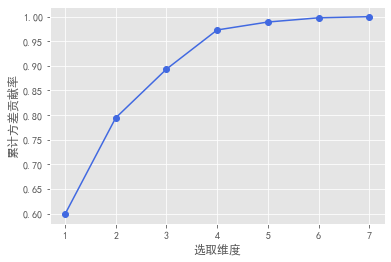

In [50]:
nd_confirm(X_scaled,8)

In [51]:
pca3 = PCA(n_components=3)
principalComponents3 = pca3.fit_transform(factor2)
principalDf3 = pd.DataFrame(data = principalComponents3, columns = ['principal component 1', 'principal component 2','principal component 3'])

In [52]:
principalDf3

,principal component 1,principal component 2,principal component 3
0,419.567204,-222.336920,5.870330
1,-214.739984,-30.534464,18.093968
2,617.690251,-19.375397,-34.898348
3,617.739371,-19.465320,-28.360351
4,419.605098,-222.396815,10.355875
...,...,...,...
1995,-448.160485,-124.834607,-15.265381
1996,306.161417,-194.300836,14.504523
1997,-75.803071,-141.813095,25.344201
1998,-530.044692,-25.985367,20.709046


In [53]:
X_train,X_test,Y_train,Y_test = train_test_split(principalDf3,price,train_size=.80,random_state=100)
regr = linear_model.LinearRegression()
regr.fit(X_train,Y_train)
Y_pred = regr.predict(X_test)
# The coefficients
print('Coef_: {} Intercept_: {}\n'.format(regr.coef_, regr.intercept_))
print(regr.score(X_test,Y_test))
print(regr.score(X_trian,Y_trian))

Coef_: [-0.05776663 -0.23652379  0.48434997] Intercept_: 1594.6988571456984

0.016443477061131362


In [56]:
pca4 = PCA(n_components=4)
principalComponents4 = pca4.fit_transform(factor2)
principalDf4 = pd.DataFrame(data = principalComponents4, columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4'])

In [57]:
principalDf4

,principal component 1,principal component 2,principal component 3,principal component 4
0,419.567204,-222.336920,5.870330,-23.094278
1,-214.739984,-30.534464,18.093968,-33.784277
2,617.690251,-19.375397,-34.898348,34.836508
3,617.739371,-19.465320,-28.360351,39.941241
4,419.605098,-222.396815,10.355875,-20.061108
...,...,...,...,...
1995,-448.160485,-124.834607,-15.265381,15.999300
1996,306.161417,-194.300836,14.504523,0.442675
1997,-75.803071,-141.813095,25.344201,-31.124299
1998,-530.044692,-25.985367,20.709046,-32.304436


In [58]:
X_train,X_test,Y_train,Y_test = train_test_split(principalDf4,price,train_size=.80,random_state=100)
regr = linear_model.LinearRegression()
regr.fit(X_train,Y_train)
Y_pred = regr.predict(X_test)
# The coefficients
print('Coef_: {} Intercept_: {}\n'.format(regr.coef_, regr.intercept_))
print(regr.score(X_test,Y_test))

Coef_: [-0.05856247 -0.23551799  0.46127649  0.68510697] Intercept_: 1594.812824613304

0.017849978659620014


In [72]:
values = [40.75061007, 10.12470949, 0.13733411, 0.07518772, 26.72050603, 6.1385885, 0.13112221]
value = (values-np.mean(values))/np.std(values)

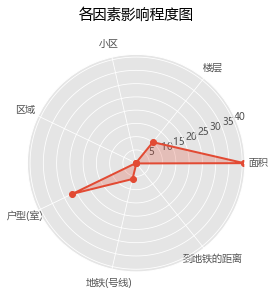

In [77]:
# 导入第三方模块
import numpy as np
import matplotlib.pyplot as plt

# 中文和负号的正常显示
plt.rcParams['font.sans-serif'] = 'Microsoft YaHei'
plt.rcParams['axes.unicode_minus'] = False

# 使用ggplot的绘图风格
plt.style.use('ggplot')

# 构造数据
values = [40.75061007, 10.12470949, 0.13733411, 0.07518772, 26.72050603, 6.1385885, 0.13112221]
feature = [ '面积', '楼层', '小区', '区域', '户型(室)', '地铁(号线)', '到地铁的距离']

N = len(values)
# 设置雷达图的角度，用于平分切开一个圆面
angles=np.linspace(0, 2*np.pi, N, endpoint=False)

# 为了使雷达图一圈封闭起来，需要下面的步骤
values=np.concatenate((values,[values[0]]))
angles=np.concatenate((angles,[angles[0]]))

# 绘图
fig=plt.figure()
# 这里一定要设置为极坐标格式
ax = fig.add_subplot(111, polar=True)
# 绘制折线图
ax.plot(angles, values, 'o-', linewidth=2)
# 填充颜色
ax.fill(angles, values, alpha=0.25)
# 添加每个特征的标签
ax.set_thetagrids(angles * 180/np.pi, feature)
# 设置雷达图的范围
ax.set_ylim(0,41)
# 添加标题
plt.title('各因素影响程度图\n')
# 添加网格线
ax.grid(True)
# 显示图形
plt.show()